# Exploratory Data Analysis

In [1]:
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import math
import re

## 1.- Read data

In [2]:
df_ca=pd.read_excel("patient_survival_ca_prostate_00-10.xlsx", 
                    index_col=None,
                    na_values= np.nan)

To anonymize the database, the column containing the medical record number of all patients is removed. A new dataFarme is also created to assign each medical record to a number and, subsequently, to be able to trace each one.

In [3]:
df_final=df_ca.sort_values(["F.Diagnóstico"],ascending=True).reset_index()
df_HCL=df_final[["index","Num.HCL"]]
df_final.drop(["Num.HCL","Num_HCL"], axis=1,inplace=True)

## 2.- Data exploration

In [4]:
pd.set_option('display.max_columns', 15)
pd.set_option("max_colwidth", 18)
pd.set_option('display.max_rows', 22)

In [5]:
df_final.head()

,index,Edad Diag.,Cod Diag,Diagnóstico,Cod Sitio,Sitio,SEER Estadio,...,Fec.Reg.Seguim.,Estado Vital,Clase Caso,Clase Caso.1,F. Pase Control,E.Tratam.,Estado Tratamiento
0,0,59,81403,Adenocarcinoma...,C619,Glandula prost...,9,...,2017/01/27,Vivo,42,Dx fuera y sol...,2000/12/15,0,Caso completo
1,1,61,81403,Adenocarcinoma...,C619,Glandula prost...,7,...,2002/06/11,Muerto,32,Dx y TODO el T...,2001/04/20,0,Caso completo
2,2,74,81403,Adenocarcinoma...,C619,Glandula prost...,7,...,2012/03/07,Muerto,14,Dx y TODO el T...,2001/04/09,0,Caso completo
3,3,59,81403,Adenocarcinoma...,C619,Glandula prost...,3,...,2013/08/15,Vivo,14,Dx y TODO el T...,2000/05/08,0,Caso completo
4,4,62,81403,Adenocarcinoma...,C619,Glandula prost...,2,...,2013/06/04,Muerto,14,Dx y TODO el T...,2000/03/09,0,Caso completo


In [6]:
df_final.tail()

,index,Edad Diag.,Cod Diag,Diagnóstico,Cod Sitio,Sitio,SEER Estadio,...,Fec.Reg.Seguim.,Estado Vital,Clase Caso,Clase Caso.1,F. Pase Control,E.Tratam.,Estado Tratamiento
1634,1634,80,81403,Adenocarcinoma...,C619,Glandula prost...,9,...,2018/05/21,Vivo,22,Dx fuera y TOD...,2011/04/06,0,Caso completo
1635,1635,71,81403,Adenocarcinoma...,C619,Glandula prost...,1,...,2018/05/28,Vivo,22,Dx fuera y TOD...,2011/03/23,0,Caso completo
1636,1636,70,81403,Adenocarcinoma...,C619,Glandula prost...,7,...,2012/07/19,Muerto,14,Dx y TODO el T...,2011/03/01,0,Caso completo
1637,1637,61,81403,Adenocarcinoma...,C619,Glandula prost...,9,...,2018/05/16,Vivo,32,Dx y TODO el T...,2010/12/23,0,Caso completo
1638,1638,81,81403,Adenocarcinoma...,C619,Glandula prost...,7,...,2018/05/24,Muerto,22,Dx fuera y TOD...,2011/03/04,0,Caso completo


In [7]:
df_final.describe()

,index,Edad Diag.,Cod Diag,SEER Estadio,TIPO CX Sitio Primario,Ciclos o Gray Recib.1,Tipo Rec.1,Tipo Rec.2,Clase Caso,E.Tratam.
count,1639.000000,1639.000000,1639.000000,1639.000000,267.000000,326.000000,1639.000000,1639.000000,1639.000000,1639.000000
mean,819.000000,69.472849,81474.109823,5.082367,48.696629,68.644172,62.370958,838.461257,22.038438,0.768761
std,473.282861,8.768998,674.772300,3.323969,10.529305,8.998257,81.952525,199.876402,9.756766,19.205771
min,0.000000,35.000000,80003.000000,0.000000,5.000000,12.000000,0.000000,10.000000,0.000000,0.000000
25%,409.500000,63.000000,81403.000000,2.000000,50.000000,70.000000,10.000000,888.000000,14.000000,0.000000
50%,819.000000,70.000000,81403.000000,7.000000,50.000000,70.000000,70.000000,888.000000,22.000000,0.000000
75%,1228.500000,76.000000,81403.000000,9.000000,50.000000,70.000000,99.000000,888.000000,22.000000,0.000000
max,1638.000000,96.000000,96803.000000,9.000000,99.000000,120.000000,888.000000,888.000000,99.000000,777.000000


In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       1639 non-null   int64  
 1   Edad Diag.                  1639 non-null   int64  
 2   Cod Diag                    1639 non-null   int64  
 3   Diagnóstico                 1639 non-null   object 
 4   Cod Sitio                   1639 non-null   object 
 5   Sitio                       1639 non-null   object 
 6   SEER Estadio                1639 non-null   int64  
 7   SEER Estadio.1              1639 non-null   object 
 8   TNM Estadio RH              1639 non-null   object 
 9   Otra Extensión              1639 non-null   object 
 10  F.Diagnóstico               1639 non-null   object 
 11  Tto.afuera                  282 non-null    object 
 12  F.Tto.afuera                342 non-null    object 
 13  Ttto no curativos           419 n

In [9]:
df_final.isnull().sum()[df_final.isnull().sum() !=0]

Tto.afuera               1357
F.Tto.afuera             1297
Ttto no curativos        1220
F.Ttto no curat          1218
Fecha 1erTto. - Razón     833
                         ... 
F.Tto Recurrencia        1221
Tipos Tto Recurrencia     663
Fecha Defun.              768
Causa Defunción           769
F. Pase Control            15
Length: 28, dtype: int64

In [10]:
df_final.groupby(['Diagnóstico']).count()\
                           .assign(Count=lambda dataset:dataset['Edad Diag.'],
                                   Percentage=lambda dataset:dataset['Edad Diag.']*100/dataset['Edad Diag.'].sum(),
                                  )[["Count","Percentage"]].sort_values("Count",ascending=False)

,Count,Percentage
Diagnóstico,,
Adenocarcinoma SAI,1591,97.071385
Carcinoma de cel.acinosas,25,1.525320
Neo. maligna,7,0.427090
Adenocar.tubular,2,0.122026
Ca.de cel.transicionales SAI,2,0.122026
Carcinoma SAI,2,0.122026
Carcinoma indiferenciado SAI,2,0.122026
Carcinoma neuroendocrino SAI,2,0.122026
Adenocar. mucinoso,1,0.061013


## 3.- Data cleaning

Because a review of the survival rate is to be performed, columns that are not necessary are eliminated.

In [11]:
delete_keys=['Cod Diag','Cod Sitio','Sitio','F.Ttto no curat',
             'Razón PARA NO CX', 'TIPO CX Sitio Primario',
             'fecha SIN TTO CLINICO','Razón PARA NO RT',
             'Razón PARA NO HT','Tipo OTROS TTOS','Razón PARA NO ORQUIECTOMIA',
             'Fecha OTROS TTOS', 'Razón PARA NO OTROS TTOS',
             'Metast.B Rec.', 'Metast.C Rec.','C.Defun.',
             'Clase Caso','Clase Caso.1','Num_HCL','Otra Extensión']

target_keys=[item for item in df_final.keys() if item not in delete_keys]
df_final=df_final[target_keys]

In [12]:
df_final.head()

,index,Edad Diag.,Diagnóstico,SEER Estadio,SEER Estadio.1,TNM Estadio RH,F.Diagnóstico,...,Causa Defunción,Fec.Ult.Contacto,Fec.Reg.Seguim.,Estado Vital,F. Pase Control,E.Tratam.,Estado Tratamiento
0,0,59,Adenocarcinoma...,9,No estadificad...,T777; N777; M7...,2000/01/02,...,NaN,2014/06/16,2017/01/27,Vivo,2000/12/15,0,Caso completo
1,1,61,Adenocarcinoma...,7,Metastasis dis...,T777; N777; M7...,2000/01/04,...,Tumor maligno ...,2001/04/20,2002/06/11,Muerto,2001/04/20,0,Caso completo
2,2,74,Adenocarcinoma...,7,Metastasis dis...,TX; NX; MX; EIV,2000/01/05,...,Enfermedades d...,2010/07/15,2012/03/07,Muerto,2001/04/09,0,Caso completo
3,3,59,Adenocarcinoma...,3,Regional A Los...,T777; N777; M7...,2000/01/05,...,NaN,2011/08/09,2013/08/15,Vivo,2000/05/08,0,Caso completo
4,4,62,Adenocarcinoma...,2,Regional Por E...,TX; NX; MX; EIV,2000/01/13,...,Sintomas/ sign...,2002/12/12,2013/06/04,Muerto,2000/03/09,0,Caso completo


Now, the names of variables (columns) whose format makes correct data manipulation impossible are changed.

In [13]:
df_final=df_final.rename(columns={'Edad Diag.':'Edad_diag',
                                  'SEER Estadio':'Cod_SEER_Estadio',
                                  'SEER Estadio.1':'SEER_Estadio',
                                  'Diagnóstico': 'Diagnostico',
                                  'TNM Estadio RH':'TNM_Estadio_RH',
                                  'F.Diagnóstico':'Fecha_Diag',
                                  'Tto.afuera':'Tto_afuera',
                                  'F.Tto.afuera':'Fecha_Tto_afuera',
                                  'Ttto no curativos':'Ttto_paliativo',
                                  'Fecha 1erTto. - Razón':'Tto_1',
                                  'F.Aband.Tto':'Fecha_Aband_Tto',
                                  'Fecha CIRUGIA':'Fecha_CX',
                                  'razon PARA SIN TTO CLINICO':'Muere_antes_Tto',
                                  'Tipo RADIOTERAPIA':'Radioterapia',
                                  'Fecha RT':'Fecha_RT',
                                  'Ciclos o Gray  Recib.1':'Dosis_Recib',
                                  'Fecha HORMONOTERAPIA':'Fecha_HT',
                                  'Fecha ORQUIECTOMIA':'Fecha_orquiectomia',
                                  'Metast.A Rec.':'Metastasis', 
                                  'Tipo Rec.1':'Tipo_Rec_1',
                                  'Tipo Rec.2':'Tipo_Rec_2',
                                  'F.Recurrencia':'Fecha_Rec',
                                  'F.Tto Recurrencia':'Fecha_Tto_Rec',
                                  'Tipos Tto Recurrencia':'Tipos_Tto_Rec',
                                  'Fecha Defun.':'Fecha_Defun',
                                  'Causa Defunción':'Causa_Defuncion',
                                  'Fec.Ult.Contacto':'Fecha_Ult_Contacto',
                                  'Fec.Reg.Seguim.':'Fecha_Reg_Seguim',
                                  'Estado Vital':'Estado_Vital',
                                  'F. Pase Control':'Fecha_Pase_Control',
                                  'E.Tratam.':'Cod_Estado_Tratam',
                                  'Estado Tratamiento':'Estado_Tratamiento'})

In order to be able to manipulate the data through dataframe.assign(), the "na" values are replaced with dataframe.fillna() by a blank space ("").

In [14]:
df_final=df_final.fillna("")

Continuing with the cleaning we notice that there are 4 variables contained in one ("TNM_Estadio_RH"), which are in string format, so this string is divided with str.split() considering ";" as separator.The value of each is stored in a new variable. Finally, the column "TNM_State_RH" is deleted.

In [15]:
dp=df_final.assign(T=lambda dataset:dataset["TNM_Estadio_RH"]\
                                 .apply(lambda row:row.split(sep=';')[0]\
                                 .split(sep='T')[1]),
                   N=lambda dataset:dataset["TNM_Estadio_RH"]\
                                 .apply(lambda row:row.split(sep=';')[1]\
                                 .split(sep='N')[1]),
                   M=lambda dataset:dataset["TNM_Estadio_RH"]\
                                 .apply(lambda row:row.split(sep=';')[2]\
                                 .split(sep='M')[1]),
                   E=lambda dataset:dataset["TNM_Estadio_RH"]\
                                 .apply(lambda row:row.split(sep=';')[3]\
                                 .split(sep='E')[1])
                  ).drop(["TNM_Estadio_RH"], axis=1)

Now, there is also the variables "Tto_afuera" and "Tipos_Tto_Rec" which has several variables contained in it. TThese variables will be created as dummy variables to represent their presence or absence.

In [16]:
dp=dp.assign(CX_fuera=lambda dataset:dataset["Tto_afuera"]\
                                     .apply(lambda row:1 if re.search('CX',row)\
                                                       else 0),
             HT_fuera=lambda dataset:dataset["Tto_afuera"]\
                                     .apply(lambda row:1 if re.search('HT',row)\
                                                       else 0),
             QT_fuera=lambda dataset:dataset["Tto_afuera"]\
                                     .apply(lambda row:1 if re.search('QT',row)\
                                                       else 0),
             OT_fuera=lambda dataset:dataset["Tto_afuera"]\
                                     .apply(lambda row:1 if re.search('OT',row)\
                                                       else 0),
             CX_Rec=lambda dataset:dataset["Tipos_Tto_Rec"]\
                                 .apply(lambda row:1 if re.search('CX',row)\
                                                       else 0),
             HT_Rec=lambda dataset:dataset["Tipos_Tto_Rec"]\
                                 .apply(lambda row:1 if re.search('HT',row)\
                                                       else 0),
             QT_Rec=lambda dataset:dataset["Tipos_Tto_Rec"]\
                                 .apply(lambda row:1 if re.search('QT',row)\
                                                       else 0),
             RT_Rec=lambda dataset:dataset["Tipos_Tto_Rec"]\
                                 .apply(lambda row:1 if re.search('RT',row)\
                                                       else 0)
                  ).drop(["Tipos_Tto_Rec"], axis=1)

The value of the variable "Fecha_Tto_1" contains values of two different variables separated by a hyphen. This variable expresses the treatment start date followed by the type of treatment.

In [17]:
dp=dp.assign(Fecha_Tto_1=lambda dataset:dataset["Tto_1"]\
                                        .apply(lambda row:row.split(sep='-')[0]),
             Tto_1=lambda dataset:dataset["Tto_1"]\
                                        .apply(lambda row: re.search(r'[a-zA-Z0]+$',row)[0] 
                                                           if re.search(r'[a-zA-Z0]+$',row)
                                                           else row))

Since there is only the variable with the date of the patients who underwent a certain procedure/treatment, a new variable is created containing information on the presence or absence of the procedure/treatment.Invalid values must be considered:
* " "  : Blank space (absence of information)
* 777 : No information available
* 888 : Not applicable


In [18]:
dp=dp.assign(Aband_Tto=lambda dataset:dataset["Fecha_Aband_Tto"]\
                                            .apply(lambda row: 1 if row!=""and row!="888" and row!="777"\
                                                                else 0),
             Hormonoterapia=lambda dataset:dataset["Fecha_HT"]\
                                           .apply(lambda row: 1 if row!=""and row!="888" and row!="777"\
                                                                 else 0),
             Orquiectomia=lambda dataset:dataset["Fecha_orquiectomia"]\
                                           .apply(lambda row: 1 if row!=""and row!="888" and row!="777"\
                                                                 else 0),
              Recurrecia=lambda dataset:dataset["Fecha_Rec"]\
                                            .apply(lambda row: 1 if row!=""and row!="888" and row!="777"\
                                                                  else 0)
            )

In the variable "Muere_antes_Tto" there are several codes that represent different events of which we only need to know if the patient died before the treatment was started, so we replace them.

In [19]:
dp=dp.assign(Muere_antes_Tto=lambda dataset:dataset["Muere_antes_Tto"]\
                                            .apply(lambda row:1 if row=='ST02'\
                                                                  else 0))

A binary value representing the presence or absence of treatment is used to determine whether the patient received a certain treatment. This type of value is also used to determine whether or not the cancer has spread in the patient. Invalid values must be considered:
*   " " : Blank space (absence of information)
* 777 : No information available
* 888 : Not applicable


In [20]:
dp=dp.assign(Ttto_paliativo=lambda dataset:dataset["Ttto_paliativo"]\
                                 .apply(lambda row:1 if row!=""and row!="888" and row!="777"\
                                                       else 0),
             Radioterapia=lambda dataset:dataset["Radioterapia"]\
                                 .apply(lambda row:1 if re.search(r'^RT',row)\
                                                       else 0),
             Metastasis=lambda dataset:dataset["Metastasis"]\
                                 .apply(lambda row:1 if row!="" and row!="888" and row!="777"\
                                                       else 0)
                  )

In order to respect the SEER classification that classifies the stage of the patients, we replace only with the categories obtained from the official website in which there is a table of Summary Stage [SS2018](https://staging.seer.cancer.gov/eod_public/input/1.0/prostate/ss2018/?breadcrumbs=(~schema_list~),(~view_schema~,~prostate~)) of prostate cancer with their respective weighting.


In [21]:
dp=dp.assign(SEER_Estadio=lambda dataset:dataset["SEER_Estadio"].replace(
  {
    "No estadificado/ desconoce/ no especificado":"Desconocido",
    "Metastasis distante / enferm. sistematica":"Distante",
    "Regional Por Extension Directa":"Regional sólo por extensión directa",    
    "Regional A Los Ganglios Linfaticos":"Regional solo por Ganglios Linfaticos",
    'Regional NEO':'Regional (2 y 3 )'
  }
  ))

Also, in order to respect the SEER stadium coding, the values that do not belong are replaced by their corresponding value obtained from [Summary Stage 2018: Prostate](https://staging.seer.cancer.gov/eod_public/input/1.0/prostate/ss2018/?breadcrumbs=(~schema_list~),(~view_schema~,~prostate~))

In [22]:
dp["Cod_SEER_Estadio"].unique()

array([9, 7, 3, 2, 1, 0, 4, 5])

In [23]:
dp[~dp["Cod_SEER_Estadio"].isin([9,7,4,3,2,1,0])]

,index,Edad_diag,Diagnostico,Cod_SEER_Estadio,SEER_Estadio,Fecha_Diag,Tto_afuera,...,QT_Rec,RT_Rec,Fecha_Tto_1,Aband_Tto,Hormonoterapia,Orquiectomia,Recurrecia
1501,1501,52,Adenocarcinoma...,5,Regional (2 y 3 ),2010/04/20,CX,...,0,0,2010/09/13,0,0,0,1


All values different from 9,7,4,3,2,1 and 0, must be replaced with their corresponding value obtained in the page mentioned above.

In [24]:
dp=dp.assign(Cod_SEER_Estadio=lambda dataset:dataset["Cod_SEER_Estadio"].replace(
              {
                5:4
              })
             ) 

The ["Causa_Defuncion"] variable must keep the categories related to causes that indicate the influence of cancer on it, so the categories that have no relevance are replaced by "Otros".

In [25]:
dp2=dp.assign(Causa_Defuncion=lambda dataset:dataset["Causa_Defuncion"].replace(
  {
    "Sintomas/ signos y hallazgos ":"Otros",
    "Tumor maligno de Organos digestivos":"Otros",    
    "Enfermedades del sistema circulatorio":"Otros",
    "Enfermedades del aparato digestivo":"Otros",             
    "Enfermedades endocrinas/ ":"Otros",      
    "Tumores malignos tejido linfatico/ de ":"Tumores malignos tejido linfatico",      
    "Tumor maligno de Piel"  :"Otros", 
    "Tumor maligno de Labio/ cavidad ":"Otros",             
    "sin dato":np.nan,                                   
    "Tumores malignos de sitios mal ":"Otros",             
    "Enfermedades de la sangre y organos " :"Otros",      
    "Tumores malignos (primarios) de "  :"Otros",           
    "Causas extremas de morbilidad y de " :"Otros",        
    "Tumor maligno de Ojo/ encefalo y " :"Otros",          
    "Tumor maligno de Tejidos " :"Otros"    
  }
  ))

The categories in the column ["Causa_Defuncion"] are checked using dataFrame.Series.value_counts()

In [26]:
dp2["Causa_Defuncion"].value_counts()

                                       769
Tumor maligno de Organos genitales     582
Otros                                  262
Tumor maligno de Vias urinarias          9
Enfermedades del sistema                 7
Tumores malignos tejido linfatico        5
Enfermedades del aparato                 3
Name: Causa_Defuncion, dtype: int64

Now, we check the format of the variables using dataFrame.info()

In [27]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               1639 non-null   int64 
 1   Edad_diag           1639 non-null   int64 
 2   Diagnostico         1639 non-null   object
 3   Cod_SEER_Estadio    1639 non-null   int64 
 4   SEER_Estadio        1639 non-null   object
 5   Fecha_Diag          1639 non-null   object
 6   Tto_afuera          1639 non-null   object
 7   Fecha_Tto_afuera    1639 non-null   object
 8   Ttto_paliativo      1639 non-null   int64 
 9   Tto_1               1639 non-null   object
 10  Fecha_Aband_Tto     1639 non-null   object
 11  Fecha_CX            1639 non-null   object
 12  Muere_antes_Tto     1639 non-null   int64 
 13  Radioterapia        1639 non-null   int64 
 14  Fecha_RT            1639 non-null   object
 15  Dosis_Recib         1639 non-null   object
 16  Fecha_HT            1639

Each variable representing a date must be changed to "datetime64[ns]" format.

In [28]:
dp2=dp2.assign(Fecha_Diag=lambda dataset:dataset["Fecha_Diag"].astype("datetime64[ns]"),
              Fecha_Tto_afuera=lambda dataset:dataset["Fecha_Tto_afuera"]\
                                                         .astype("datetime64[ns]"),
              Fecha_Tto_1=lambda dataset:dataset["Fecha_Tto_1"]\
                                                         .astype("datetime64[ns]"),
              Fecha_Aband_Tto=lambda dataset:dataset["Fecha_Aband_Tto"]\
                                                         .astype("datetime64[ns]"),
              Fecha_CX=lambda dataset:dataset["Fecha_CX"].astype("datetime64[ns]"),
              Fecha_RT=lambda dataset:dataset["Fecha_RT"].astype("datetime64[ns]"),
              Fecha_HT=lambda dataset:dataset["Fecha_HT"].astype("datetime64[ns]"),
              Fecha_orquiectomia=lambda dataset:dataset["Fecha_orquiectomia"]\
                                                          .astype("datetime64[ns]"),
              Fecha_Rec=lambda dataset:dataset["Fecha_Rec"].astype("datetime64[ns]"),
              Fecha_Tto_Rec=lambda dataset:dataset["Fecha_Tto_Rec"]\
                                                          .astype("datetime64[ns]"),
              Fecha_Defun=lambda dataset:dataset["Fecha_Defun"]\
                                                          .astype("datetime64[ns]"),
              Fecha_Ult_Contacto=lambda dataset:dataset["Fecha_Ult_Contacto"]\
                                                          .astype("datetime64[ns]"),
              Fecha_Reg_Seguim=lambda dataset:dataset["Fecha_Reg_Seguim"]\
                                                          .astype("datetime64[ns]"),
              Fecha_Pase_Control=lambda dataset:dataset["Fecha_Pase_Control"]\
                                                          .astype("datetime64[ns]"),
               )

For this type of review, only the stages are needed and not their subclassifications. A search is made for all the categories present in column "E", which contains the stages of each patient.

In [29]:
dp2["E"].value_counts()

IV      628
777     350
II      268
III     202
99      100
I        84
IIIB      4
88        2
IC        1
Name: E, dtype: int64

Only stages I, II, III and IV are retained, and their subclassifications are attached to the main branch of stages.

In [30]:
dp2 = dp2.replace('IC', 'I')
dp2 = dp2.replace('IIIB', 'III')

Finally we replace the missing data with np.nan and rearrange the position of the columns.. Invalid values must be considered:
* " "  : Blank space (absence of information)
* 777 : No information available
* 888 : Not applicable
* 99 : Not data
* 88 : Not data

In [31]:
dp2 = dp2.replace(['888','777','88','99',''], np.nan)
dp2 = dp2[[ "index","Edad_diag", "Diagnostico", "Cod_SEER_Estadio", "SEER_Estadio",
           "Fecha_Diag", "T", "N", "M", "E", "CX_fuera", "HT_fuera", 
           "QT_fuera", "OT_fuera","Fecha_Tto_afuera", "Ttto_paliativo",
           "Tto_1", "Muere_antes_Tto","Fecha_Tto_1","Aband_Tto", 
           "Fecha_Aband_Tto","Fecha_CX", "Hormonoterapia","Fecha_HT",
           "Orquiectomia","Fecha_orquiectomia","Radioterapia","Dosis_Recib",
           "Fecha_RT","Recurrecia","Tipo_Rec_1", "Tipo_Rec_2","Fecha_Rec",
           "Metastasis","CX_Rec", "HT_Rec", "QT_Rec", "RT_Rec", 
           "Fecha_Tto_Rec","Fecha_Pase_Control","Fecha_Reg_Seguim",
           "Fecha_Ult_Contacto","Cod_Estado_Tratam","Estado_Tratamiento",
           "Estado_Vital","Fecha_Defun","Causa_Defuncion"]]
dp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               1639 non-null   int64         
 1   Edad_diag           1639 non-null   int64         
 2   Diagnostico         1639 non-null   object        
 3   Cod_SEER_Estadio    1639 non-null   int64         
 4   SEER_Estadio        1639 non-null   object        
 5   Fecha_Diag          1639 non-null   datetime64[ns]
 6   T                   1176 non-null   object        
 7   N                   1229 non-null   object        
 8   M                   1273 non-null   object        
 9   E                   1187 non-null   object        
 10  CX_fuera            1639 non-null   int64         
 11  HT_fuera            1639 non-null   int64         
 12  QT_fuera            1639 non-null   int64         
 13  OT_fuera            1639 non-null   int64       

## Modification

New variables are created using the clean dataset in order to generate graphs to better visualize the contained data.

Two new variables are created in the dataset:
* __tiempo_defuncion__: years from diagnosis to death.
* __tiempo_vivo__: years from diagnosis to the time of database generation.

In [32]:
tiempo_final="2020-12-31"
tiempo_final=datetime.strptime(tiempo_final, '%Y-%m-%d')

dp2=dp2.assign(tiempo_defuncion=lambda dataset:round((dataset["Fecha_Defun"]-dataset["Fecha_Diag"]).dt.days / 365,1),
               tiempo_vivo=lambda dataset:round((tiempo_final-dataset["Fecha_Diag"][dataset["Estado_Vital"]=="Vivo"]).dt.days / 365,1),
               tiempo_recurr=lambda dataset:round((dataset["Fecha_Rec"]-dataset["Fecha_Diag"]).dt.days / 365,1))

A query is made to look for negative values in the new variable "tiempo_defuncion" since there should not be any value less than zero.

In [33]:
dp2[["Fecha_Diag","Fecha_Defun"]][dp2["tiempo_defuncion"]<0]

,Fecha_Diag,Fecha_Defun
493,2004-01-01,2001-02-11
1046,2007-10-09,2006-03-17


two negative values are found. Since there are very few data with respect to the whole dataset, they are eliminated.

In [34]:
dp2.drop(dp2[["Fecha_Diag","Fecha_Defun"]][dp2["tiempo_defuncion"]<0].index,inplace=True)

A query is made to look for negative values in the new variable "tiempo_vivo" since there should not be any value less than zero.

In [35]:
dp2[["Fecha_Diag","Fecha_Defun"]][dp2["tiempo_vivo"]<0]

,Fecha_Diag,Fecha_Defun


Since no negative value is found, the datase is preserved. Finally, it can be said that the dataset is clean.

## 4.- Data visualization

In [36]:
sns.set_theme(style="darkgrid")

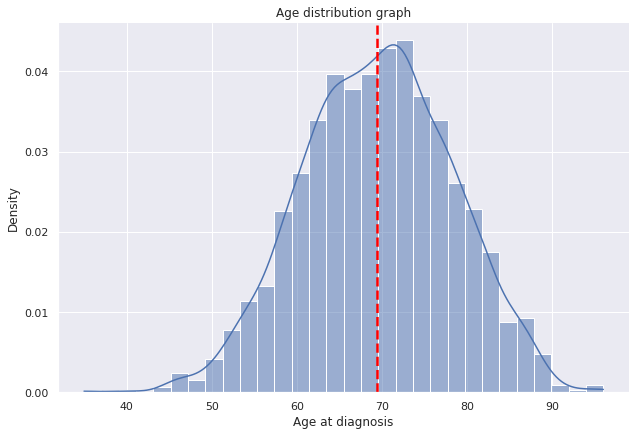

In [91]:
g=sns.displot(data=dp2,x="Edad_diag",
            bins=30,kde=True,
            kde_kws={'bw_adjust':0.9,'bw_method':'scott'},
            stat='density', height=6,aspect=1.5).set(ylabel=None).set(title='Age distribution plot')

plt.axvline(dp2["Edad_diag"].mean(),c="red", ls='--',lw=2.5);
g.set(ylabel='Density', xlabel='Age at diagnosis');

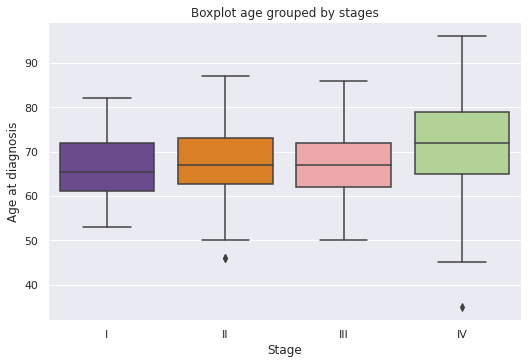

In [85]:
g = sns.catplot(x="E",
                y="Edad_diag",
                data=dp2.sort_values("E",ascending=True),
                kind="box",
                palette="Paired_r",
                saturation=0.7,
                height=5, aspect=1.5).set(title='Boxplot age grouped by stages')

g.set(xlabel='Stage', ylabel='Age at diagnosis');

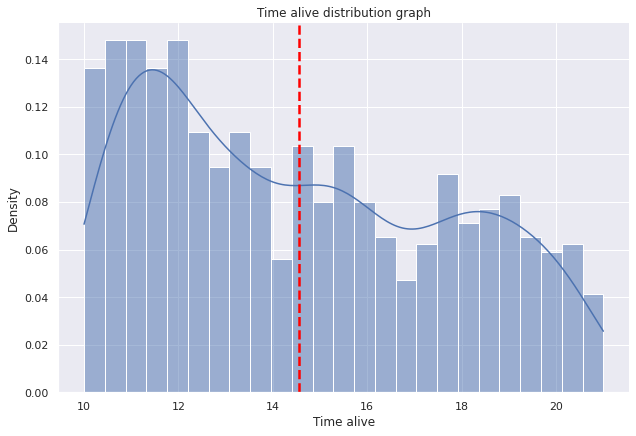

In [90]:
g=sns.displot(data=dp2,x="tiempo_vivo",
            bins=25,kde=True,
            kde_kws={'bw_adjust':0.9,'bw_method':'scott'},
            stat='density', height=6,aspect=1.5).set(ylabel=None).set(title='Time alive distribution plot')

plt.axvline(dp2["tiempo_vivo"].mean(),c="red", ls='--',lw=2.5);
g.set(xlabel='Time alive', ylabel='Density');

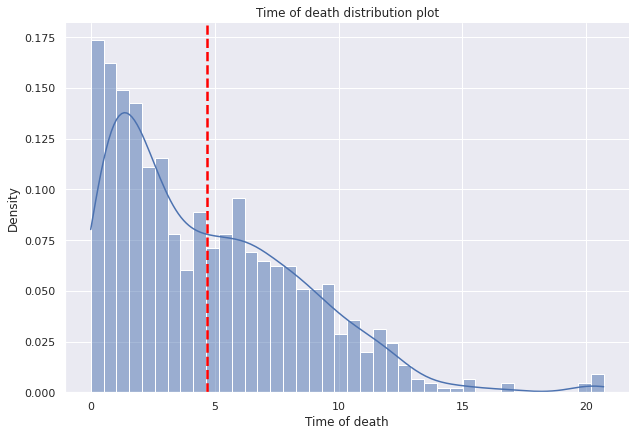

In [92]:
g=sns.displot(data=dp2,x="tiempo_defuncion",
            bins=40,kde=True,
            kde_kws={'bw_adjust':0.9,'bw_method':'scott'},
            stat='density', height=6,aspect=1.5).set(ylabel=None).set(title='Time of death distribution plot')

plt.axvline(dp2["tiempo_defuncion"].mean(),c="red", ls='--',lw=2.5);
g.set(xlabel='Time of death', ylabel='Density');

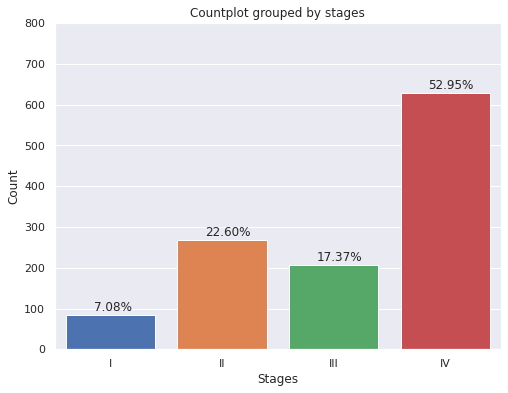

In [100]:
plt.figure(figsize = (8,6))
g=sns.countplot(x='E',
                data=dp2.sort_values("E",ascending=True),
                saturation=1)

g.set(ylim=(0, 800))
g.set(title='Countplot grouped by stages')
g.set(xlabel='Stages', ylabel='Count');
for p in g.patches:
    g.annotate('{:.2f}%'.format(p.get_height()*100/dp2['E'].count()), (p.get_x()+0.25, p.get_height()+10))

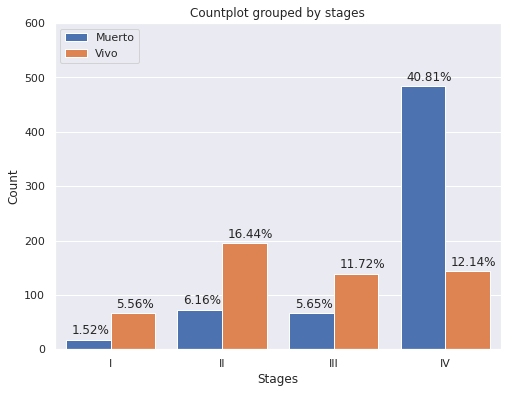

In [101]:
plt.figure(figsize = (8,6))
g=sns.countplot(x='E',
                data=dp2.sort_values("E",ascending=True),
                hue="Estado_Vital",hue_order=["Muerto","Vivo"],
                saturation=1)
g.set(ylim=(0, 600))
g.set(title='Countplot grouped by stages')
g.set(xlabel='Stages', ylabel='Count');
plt.legend(loc='upper left')
for p in g.patches:
    g.annotate('{:.2f}%'.format(p.get_height()*100/dp2['E'].count()), (p.get_x()+.05, p.get_height()+10))

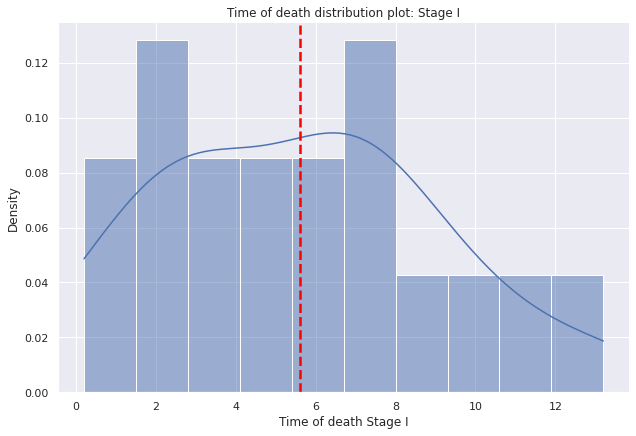

In [102]:
g=sns.displot(data=dp2[dp2["E"]=="I"],
              x="tiempo_defuncion",
              bins=10,kde=True,
              kde_kws={'bw_adjust':0.9,'bw_method':'scott'},
              stat='density', height=6,aspect=1.5).set(ylabel=None)

g.set(title='Time of death distribution plot: Stage I')
g.set(xlabel='Time of death Stage I', ylabel='Density')
plt.axvline(dp2[dp2["E"]=="I"]["tiempo_defuncion"].mean(),c="red", ls='--',lw=2.5);

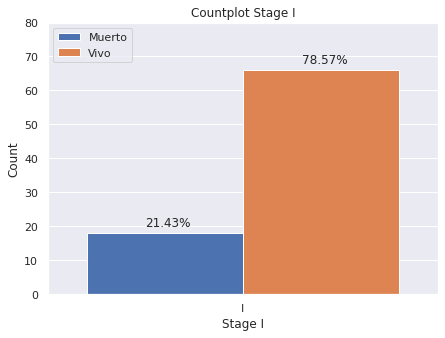

In [116]:
plt.figure(figsize = (7,5))
g=sns.countplot(x='E',
                data=dp2[dp2["E"]=="I"],
                hue="Estado_Vital",hue_order=["Muerto","Vivo"],
                saturation=1)

g.set(ylim=(0, 80))
plt.legend(loc='upper left')
g.set(title='Countplot Stage I')
g.set(xlabel='Stage I', ylabel='Count')

for p in g.patches:
    g.annotate('{:.2f}%'.format(p.get_height()*100/dp2[dp2["E"]=="I"]["index"].count()), (p.get_x()+.15, p.get_height()+2))

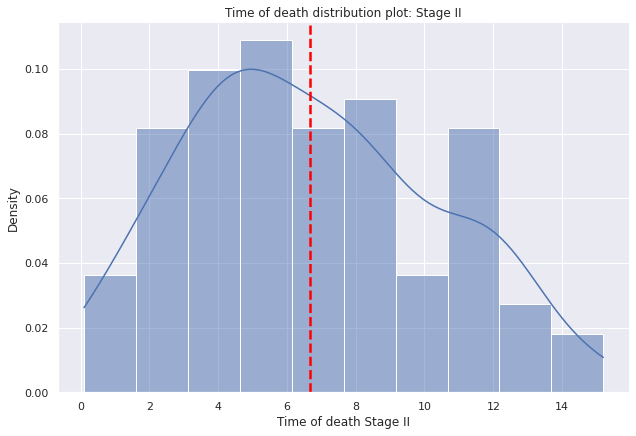

In [104]:
g=sns.displot(data=dp2[dp2["E"]=="II"],
              x="tiempo_defuncion",
              bins=10,kde=True,
              kde_kws={'bw_adjust':0.9,'bw_method':'scott'},
              stat='density', height=6,aspect=1.5).set(ylabel=None)

g.set(title='Time of death distribution plot: Stage II')
g.set(xlabel='Time of death Stage II', ylabel='Density')
plt.axvline(dp2[dp2["E"]=="II"]["tiempo_defuncion"].mean(),c="red", ls='--',lw=2.5);

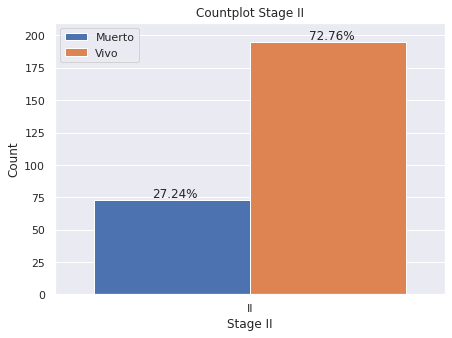

In [117]:
plt.figure(figsize = (7,5))
g=sns.countplot(x='E',
                data=dp2[dp2["E"]=="II"],
                hue="Estado_Vital",hue_order=["Muerto","Vivo"],
                saturation=1)
g.set(ylim=(0, 210))
plt.legend(loc='upper left')
g.set(title='Countplot Stage II')
g.set(xlabel='Stage II', ylabel='Count')
for p in g.patches:
    g.annotate('{:.2f}%'.format(p.get_height()*100/dp2[dp2["E"]=="II"]["index"].count()), (p.get_x()+.15, p.get_height()+2))

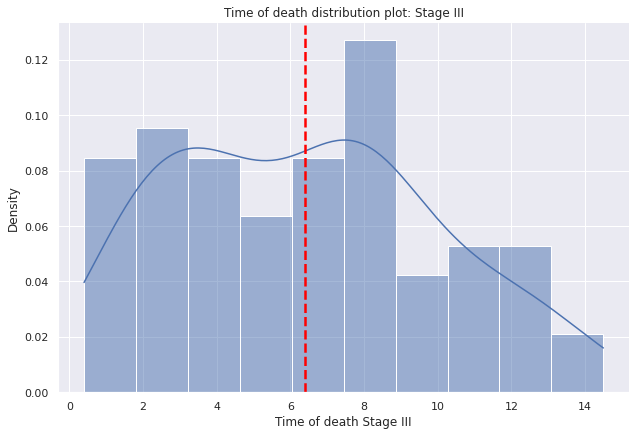

In [105]:
g=sns.displot(data=dp2[dp2["E"]=="III"],
              x="tiempo_defuncion",
              bins=10,kde=True,
              kde_kws={'bw_adjust':0.9,'bw_method':'scott'},
              stat='density', height=6,aspect=1.5).set(ylabel=None)

g.set(title='Time of death distribution plot: Stage III')
g.set(xlabel='Time of death Stage III', ylabel='Density')
plt.axvline(dp2[dp2["E"]=="III"]["tiempo_defuncion"].mean(),c="red", ls='--',lw=2.5);

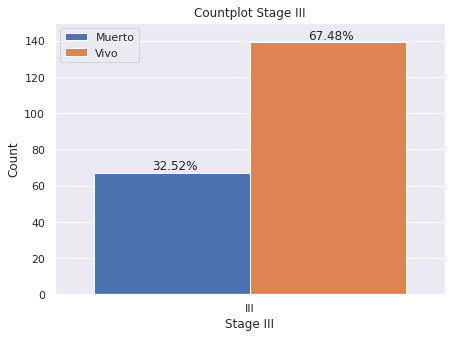

In [119]:
plt.figure(figsize = (7,5))
g=sns.countplot(x='E',
                data=dp2[dp2["E"]=="III"],
                hue="Estado_Vital",hue_order=["Muerto","Vivo"],
                saturation=1)
g.set(ylim=(0, 150))
plt.legend(loc='upper left')
g.set(title='Countplot Stage III')
g.set(xlabel='Stage III', ylabel='Count')
for p in g.patches:
    g.annotate('{:.2f}%'.format(p.get_height()*100/dp2[dp2["E"]=="III"]["index"].count()), (p.get_x()+.15, p.get_height()+2))

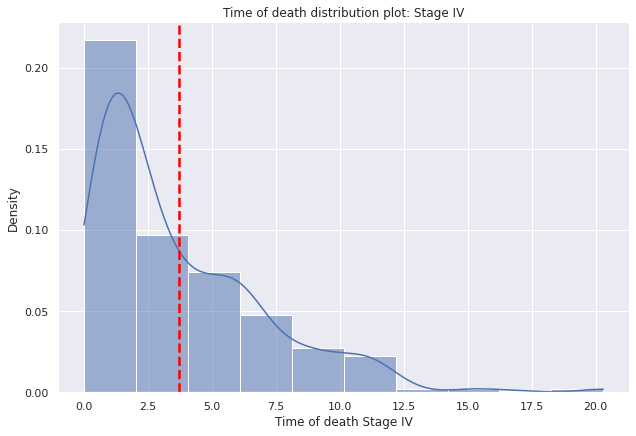

In [106]:
g=sns.displot(data=dp2[dp2["E"]=="IV"],
              x="tiempo_defuncion",
              bins=10,kde=True,
              kde_kws={'bw_adjust':0.9,'bw_method':'scott'},
              stat='density', height=6,aspect=1.5).set(ylabel=None)

g.set(title='Time of death distribution plot: Stage IV')
g.set(xlabel='Time of death Stage IV', ylabel='Density')
plt.axvline(dp2[dp2["E"]=="IV"]["tiempo_defuncion"].mean(),c="red", ls='--',lw=2.5);

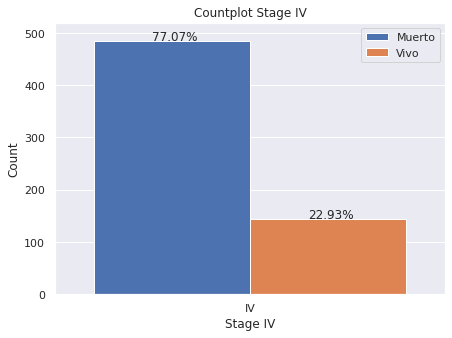

In [120]:
plt.figure(figsize = (7,5))
g=sns.countplot(x='E',
                data=dp2[dp2["E"]=="IV"],
                hue="Estado_Vital",hue_order=["Muerto","Vivo"],
                saturation=1)
g.set(ylim=(0, 520))
plt.legend(loc='upper right')
g.set(title='Countplot Stage IV')
g.set(xlabel='Stage IV', ylabel='Count')
for p in g.patches:
    g.annotate('{:.2f}%'.format(p.get_height()*100/dp2[dp2["E"]=="IV"]["index"].count()), (p.get_x()+.15, p.get_height()+2))

### Radiotherapy

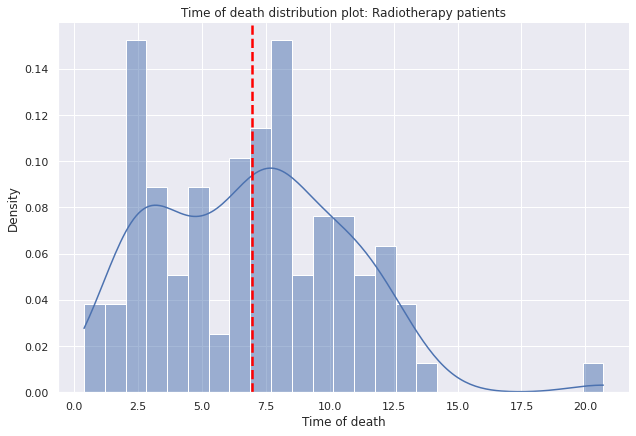

In [107]:
g=sns.displot(data=dp2[(dp2["Radioterapia"]==1)],
              x="tiempo_defuncion",
            bins=25,kde=True,
            kde_kws={'bw_adjust':0.9,'bw_method':'scott'},
            stat='density', height=6,aspect=1.5).set(ylabel=None)

g.set(title='Time of death distribution plot: Radiotherapy patients')
g.set(xlabel='Time of death', ylabel='Density')
plt.axvline(dp2[dp2["Radioterapia"]==1]["tiempo_defuncion"].mean(),c="red", ls='--',lw=2.5);

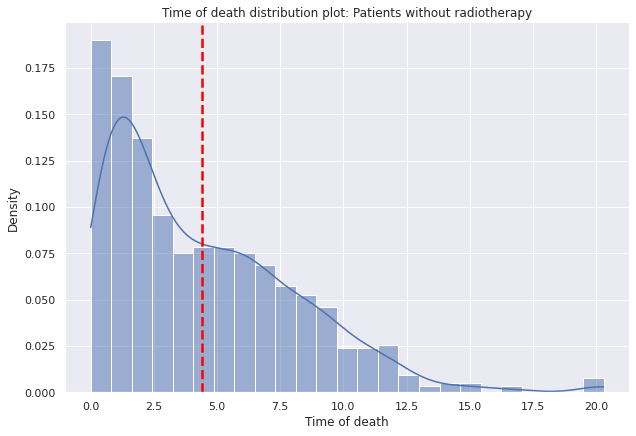

In [108]:
g=sns.displot(data=dp2[dp2["Radioterapia"]==0],x="tiempo_defuncion",
            bins=25,kde=True,
            kde_kws={'bw_adjust':0.9,'bw_method':'scott'},
            stat='density', height=6,aspect=1.5).set(ylabel=None)

g.set(title='Time of death distribution plot: Patients without radiotherapy')
g.set(xlabel='Time of death', ylabel='Density')
plt.axvline(dp2[dp2["Radioterapia"]==0]["tiempo_defuncion"].mean(),c="red", ls='--',lw=2.5);

### Survival

In [53]:
from lifelines import KaplanMeierFitter
from lifelines.utils import survival_events_from_table
from lifelines.utils import survival_table_from_events

In [54]:
df_survival=dp2.assign(R=dp2["Radioterapia"],
                       C=lambda dataset:dataset["Causa_Defuncion"].apply(lambda row:1 if row=="Otros" or row!=np.nan else 0),
                       S=lambda dataset:dataset["Estado_Vital"].apply(lambda row:1 if row=="Muerto" 
                                                                                   else 0 if row=="Vivo" 
                                                                                   else np.nan),
                       tiempo_vivo=dp2["tiempo_vivo"].replace(np.nan,""),
                       tiempo_defuncion=dp2["tiempo_defuncion"].replace(np.nan,""))

In [55]:
df_survival=df_survival.assign(T=lambda dataset:((dataset["tiempo_defuncion"].astype("str"))+dataset["tiempo_vivo"].astype("str")).astype("float"))

In [56]:
df_survival=df_survival.assign(T=round(df_survival["T"],0))

In [57]:
df_survival=df_survival[["T","S","C","E","R"]].dropna(subset=["E"])

In [58]:
df_survival.set_index("T",inplace=True,drop=False)

In [59]:
time, event, weight = survival_events_from_table(df_survival,
                                                 observed_deaths_col="S",
                                                 censored_col="C")

In [60]:
table=survival_table_from_events(df_survival["T"],
                                 df_survival["S"])
print(table.head())

          removed  observed  censored  entrance  at_risk
event_at                                                
0.0            57        57         0      1186     1186
1.0           101       101         0         0     1129
2.0           109       109         0         0     1028
3.0            57        57         0         0      919
4.0            58        58         0         0      862


In [61]:
kmf=KaplanMeierFitter()

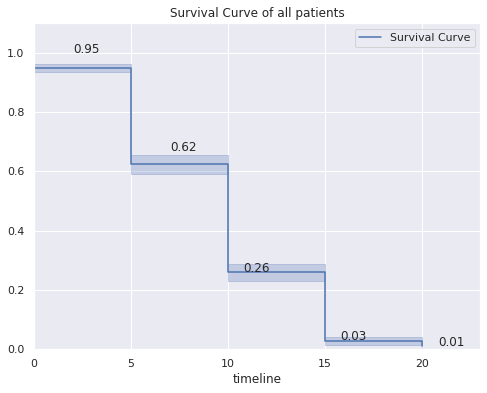

In [110]:
plt.figure(figsize = (8,6))
timelines=range(0,25,5)
kmf.fit(time,event,label="Survival Curve", timeline=timelines)
fig=kmf.plot_survival_function(show_censors=False)
fig.set(ylim=(0, 1.1),xlim=(0, 23.0))
fig.set_title('Survival Curve of all patients')

i=0
for item in kmf.survival_function_["Survival Curve"]:
    if item>.5:
        fig.annotate(str(round(item,2)),xy=(i+2,round(item,2)+.05))
    else:
        fig.annotate(str(round(item,2)),xy=(i+0.8,round(item,2)))
    i+=5

In [63]:
kmf.survival_function_

,Survival Curve
timeline,
0.0,0.968818
5.0,0.739353
10.0,0.603386
15.0,0.539839
20.0,0.490894


Text(0.5, 1.0, 'Survival Curve grouped by stages')

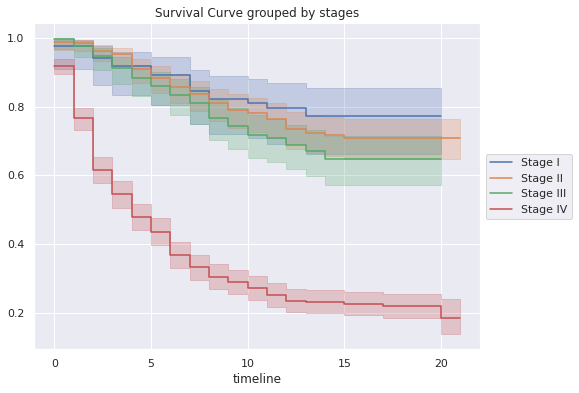

In [111]:
plt.figure(figsize = (8,6))
kmf.fit(df_survival[df_survival["E"]=="I"]["T"],
        df_survival[df_survival["E"]=="I"]["S"],
        label="Stage I")
df_s1=kmf.survival_function_
ax=kmf.plot()
kmf.fit(df_survival[df_survival["E"]=="II"]["T"],
        df_survival[df_survival["E"]=="II"]["S"],
        label="Stage II")
df_s2=kmf.survival_function_
ax=kmf.plot(ax=ax)
kmf.fit(df_survival[df_survival["E"]=="III"]["T"],
        df_survival[df_survival["E"]=="III"]["S"],
        label="Stage III")
df_s3=kmf.survival_function_
ax=kmf.plot(ax=ax)
kmf.fit(df_survival[df_survival["E"]=="IV"]["T"],
        df_survival[df_survival["E"]=="IV"]["S"],
        label="Stage IV")
df_s4=kmf.survival_function_
ax=kmf.plot(ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
ax.set_title('Survival Curve grouped by stages')

In [65]:
df_stages=pd.merge(df_s1,df_s2,on='timeline')
df_stages=pd.merge(df_stages,df_s3,on='timeline')
df_stages=pd.merge(df_stages,df_s4,on='timeline')
df_stages

,Stage I,Stage II,Stage III,Stage IV
timeline,,,,
0.0,0.976190,0.988806,0.995146,0.918790
2.0,0.940476,0.962687,0.946602,0.616242
3.0,0.916667,0.951493,0.912621,0.544586
5.0,0.892857,0.884328,0.859223,0.436306
7.0,0.845238,0.835821,0.810680,0.332803
8.0,0.821429,0.809701,0.766990,0.305732
10.0,0.809524,0.779851,0.718447,0.272293
11.0,0.796032,0.763519,0.707394,0.250969
12.0,0.796032,0.735240,0.686988,0.235160


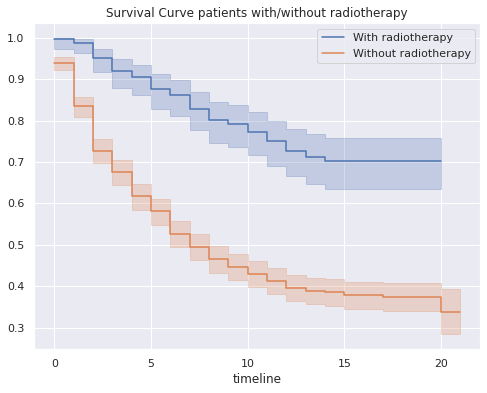

In [113]:
plt.figure(figsize = (8,6))
kmf.fit(df_survival[df_survival["R"]==1]["T"],df_survival[df_survival["R"]==1]["S"],label="With radiotherapy")
df_R1=kmf.survival_function_
ax=kmf.plot()
kmf.fit(df_survival[df_survival["R"]==0]["T"],df_survival[df_survival["R"]==0]["S"],label="Without radiotherapy")
df_R0=kmf.survival_function_
ax=kmf.plot(ax=ax)
ax.set_title('Survival Curve patients with/without radiotherapy');

In [67]:
df_R=pd.merge(df_R1,df_R0,on='timeline')
df_R

,Con Radioterapia,Sin Radioterapia
timeline,,
0.0,0.996016,0.940107
1.0,0.988048,0.834225
2.0,0.952191,0.727273
3.0,0.920319,0.674866
4.0,0.904382,0.617112
5.0,0.876494,0.580749
6.0,0.860558,0.527273
7.0,0.828685,0.495187
8.0,0.800797,0.465241


### Recurrence

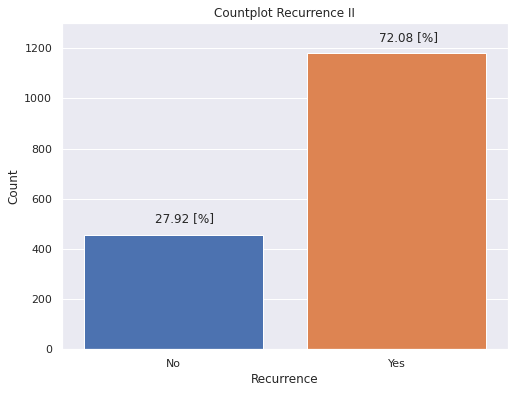

In [126]:
plt.figure(figsize = (8,6))
g=sns.countplot(x='Recurrecia',
                data=dp2,
                saturation=1)
g.set(ylim=(0, 1300))

labels = (["No","Yes"])
g.set_xticklabels(labels)
g.set(xlabel='Recurrence', ylabel='Count')
g.set(title='Countplot Recurrence II')
for p in g.patches:
    g.annotate('{:.2f} [%]'.format(p.get_height()*100/dp2['Edad_diag'].count()), (p.get_x()+0.32, p.get_height()+50))

In [69]:
df_recurr=dp2.assign(C=lambda dataset:dataset["Aband_Tto"],
                     S=lambda dataset:dataset["Recurrecia"])

In [70]:
df_recurr=df_recurr.assign(T=round(df_recurr["tiempo_recurr"],0))

In [71]:
df_recurr=df_recurr[["T","S","C","E"]].dropna(subset=["E"])
df_recurr.replace(np.nan,0,inplace=True)

In [72]:
df_recurr.set_index("T",inplace=True,drop=False)

In [73]:
time, event, weight = survival_events_from_table(df_recurr,
                                                 observed_deaths_col="S",
                                                 censored_col="C")

In [74]:
table=survival_table_from_events(df_recurr["T"],
                                 df_recurr["S"])
print(table.head())

          removed  observed  censored  entrance  at_risk
event_at                                                
0.0           380        50       330      1186     1186
1.0            95        95         0         0      806
2.0            90        90         0         0      711
3.0            44        44         0         0      621
4.0            47        47         0         0      577


In [75]:
kmf2=KaplanMeierFitter()

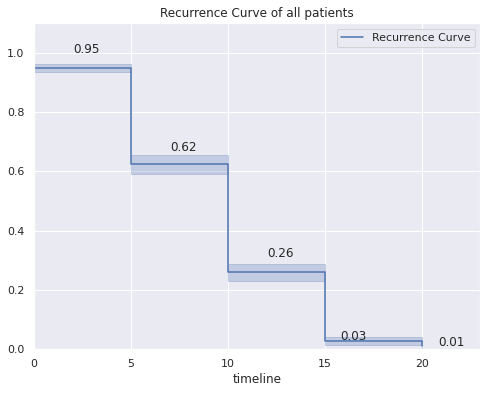

In [127]:
plt.figure(figsize = (8,6))
timelines=range(0,25,5)
kmf2.fit(time,event,label="Recurrence Curve", timeline=timelines)
fig=kmf2.plot_survival_function(show_censors=False)
fig.set(ylim=(0, 1.1),xlim=(0, 23.0))
fig.set_title('Recurrence Curve of all patients')

i=0
for item in kmf2.survival_function_["Recurrence Curve"]:
    if item>.03:
        fig.annotate(str(round(item,2)),xy=(i+2,round(item,2)+.05))
    else:
        fig.annotate(str(round(item,2)),xy=(i+0.8,round(item,2)))
    i+=5

In [77]:
kmf2.survival_function_

,Recurrence Curve
timeline,
0.0,0.949495
5.0,0.623724
10.0,0.259126
15.0,0.026448
20.0,0.011652


Text(0.5, 1.0, 'Recurrence Curve grouped by stages')

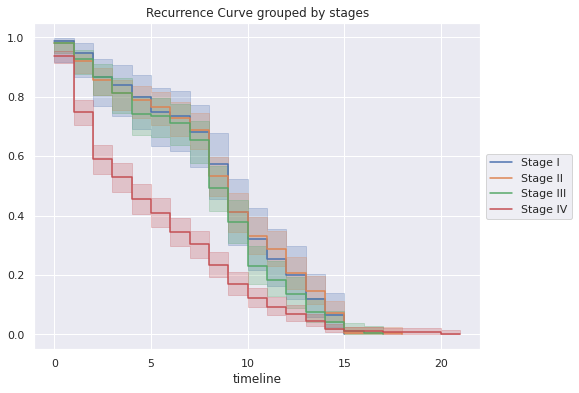

In [128]:
plt.figure(figsize = (8,6))
kmf2.fit(df_recurr[df_recurr["E"]=="I"]["T"],df_recurr[df_recurr["E"]=="I"]["S"],label="Stage I")
df2_s1=kmf2.survival_function_
ax=kmf2.plot()
kmf2.fit(df_recurr[df_recurr["E"]=="II"]["T"],df_recurr[df_recurr["E"]=="II"]["S"],label="Stage II")
df2_s2=kmf2.survival_function_
ax=kmf2.plot(ax=ax)
kmf2.fit(df_recurr[df_recurr["E"]=="III"]["T"],df_recurr[df_recurr["E"]=="III"]["S"],label="Stage III")
df2_s3=kmf2.survival_function_
ax=kmf2.plot(ax=ax)
kmf2.fit(df_recurr[df_recurr["E"]=="IV"]["T"],df_recurr[df_recurr["E"]=="IV"]["S"],label="Stage IV")
df2_s4=kmf2.survival_function_
ax=kmf2.plot(ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
ax.set_title('Recurrence Curve grouped by stages')

In [79]:
df_stages_recurr=pd.merge(df2_s1,df2_s2,on='timeline')
df_stages_recurr=pd.merge(df_stages_recurr,df2_s3,on='timeline')
df_stages_recurr=pd.merge(df_stages_recurr,df2_s4,on='timeline')
df_stages_recurr

,Stage I,Stage II,Stage III,Stage IV
timeline,,,,
0.0,0.988095,0.981343,0.980583,0.936306
1.0,0.948037,0.922006,0.927096,0.750109
2.0,0.867921,0.858105,0.867667,0.590511
3.0,0.841216,0.812461,0.814181,0.529332
4.0,0.801158,0.789639,0.742866,0.457513
5.0,0.747748,0.766817,0.736923,0.409634
6.0,0.734395,0.730302,0.713151,0.345795
7.0,0.680985,0.689222,0.653722,0.303235
8.0,0.574163,0.534033,0.493263,0.234076


## Conclusions

* The average age at diagnosis of prostate cancer in the sample was around 70 years.

* Patients with stage IV disease have a median age of 72 years, while patients with stages I, II and III have a median age greater than 65 and less than 70 years.

* The mean age at death of the patients in the sample who have died is around 5 years, which means that the majority, at least on average, live 5 years.

* The average time of death of patients is around 5 years.

* The median time of patients alive in 2020 is around 14-15 years.

* More than 50% of the patients in the sample have been diagnosed with stage IV.


* De la muestra de pacientes agrupados por estadío clínico, se pude observar:
    * __Estadio I__: 78.57% de los pacientes esta vivo hasta el momento de la generación de la base de datos en 2020
    * __Estadio II__: 72.76% de los pacientes esta vivo hasta el momento de la generación  de la base de datos en 2020
    * __Estadio III__: 67.48% de los pacientes esta vivo hasta el momento de la generación de la base de datos en 2020
    * __Estadio IV__: 22.93% de los pacientes esta vivo hasta el momento de la generación de la base de datos en 2020


* Patients who have received radiotherapy, at least on average, have a longer average lifespan than those who have not received radiotherapy.


* About the overall survival of the patients in the sample:
    * The probability of survival of a patient in the first 5 years after being diagnosed is 0.97.
    * The probability of survival of a patient between 5 and 10 years after diagnosis is 0.74
    * The probability of survival of a patient between 10 and 15 years after diagnosis is 0.6
    * The probability of survival of a patient between 15 and 20 years after diagnosis is 0.54
    * The probability of survival of a patient more than 20 years after diagnosis is 0.49


* About the survival grouped by stage of the patients in the sample:
    * The 5-year survival probability of a patient presenting stage I is 0.89, while a patient presenting stage IV is 0.44.
    * The 10-year survival probability of a patient presenting with stage I is 0.81, while a patient presenting with stage IV is 0.27.
    * The 15-year survival probability for a patient presenting with stage I is 0.77, while a patient presenting with stage IV is 0.23.
    * The 20-year survival probability for a patient presenting with stage I is 0.77, while a patient presenting with stage IV is 0.19.


* The probability of survival of a patient with stage I, II and II is much higher than that of a patient with stage IV.

* As the patient is diagnosed at an advanced stage of the disease, the probability of survival decreases dramatically.


* On the survival of the sample grouped by those patients who received radiotherapy:
    * The 5-year survival probability of a patient who received radiotherapy is 0.88, while that of a patient who did not receive is 0.58.
    * The 10-year survival probability of a patient who received radiotherapy is 0.77, while that of a patient who did not receive is 0.43.
    * The 15-year survival probability of a patient who received radiotherapy is 0.70, while that of a patient who did not receive is 0.38.
    * The 20-year survival probability of a patient who received radiotherapy is 0.70, while that of a patient who did not receive is 0.34.


* There is a large difference in the survival probability of patients who received radiotherapy, which varies greatly depending on those who did not receive this treatment.

* About the recurrence of patients:
    * 78.08% of patients present a recurrence of cancer during the study time.
    * The probability that the disease does not recur in the first 5 years is 0.95
    * The probability that the disease will not recur in the first 10 years is 0.62%.
    * The probability that the disease does not recur in the first 15 years is 0.26
    * The probability that the disease will not recur within the first 20 years is 0.03
    * The probability that the disease will not recur in the first 20 years is 0.01.
    
* The probability of non-recurrence in patients with stage IV is much lower than in those with stages I, II and III, but the probability of these stages decreasing together after 10 years, with stages I and II being very similar.

